# Visualizations

In [1]:
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.set_palette("deep")

## QR2T BLEU - No NL Ablation

In [29]:
csv_file = '../storage/results/automatic/bleu_no_nl_query_ablation_qr2t.csv'

df = pd.read_csv(csv_file)

mappings = {3: 0, 1: 8, 2: 7, 4: 9, 5: 10, 6: 11}
bleu_values = []
for no_nl_ind, with_nl_ind in mappings.items():
    bleu_values.append([
        df.iloc[no_nl_ind]['Name'].replace('Group: No NL Query | CI | ARIS | T5-small | ', ''),
        df.iloc[no_nl_ind]['bleu'],
        df.iloc[with_nl_ind]['bleu']
       ])
    
df_bleu = pd.DataFrame(bleu_values, columns=['name', 'no_nl', 'with_nl'])

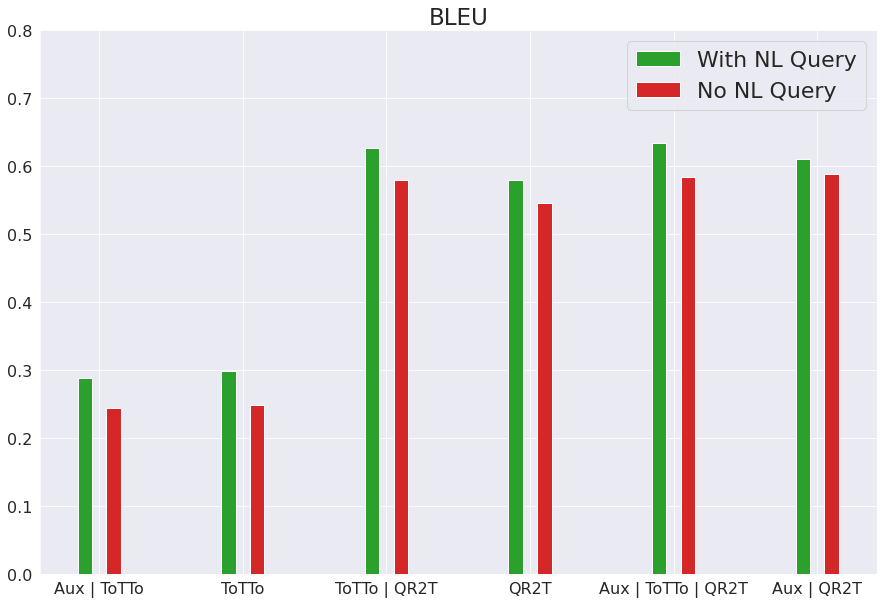

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

current_step = 1

for _, row in df_bleu.iterrows():
    plt.bar([current_step], [row['with_nl']], width=0.1, color='tab:green', label="With NL Query" if row['name'] == 'ToTTo' else None)
    plt.bar([current_step + 0.2], [row['no_nl']], width=0.1, color='tab:red', label="No NL Query" if row['name'] == 'ToTTo' else None)

    current_step += 1

plt.xticks(np.arange(1.1, 7.1), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(df_bleu['name'])

plt.ylim([0, 0.8])
plt.legend(fontsize=22)
plt.title('BLEU', fontsize=23)


plt.show()

## QR2T PARENT - No NL Ablation

In [39]:
csv_file = '../storage/results/automatic/parent_no_nl_query_ablation_qr2t.csv'

df = pd.read_csv(csv_file)

mappings = {3: 0, 1: 8, 2: 7, 4: 9, 5: 10, 6: 11}
bleu_values = []
for no_nl_ind, with_nl_ind in mappings.items():
    bleu_values.append([
        df.iloc[no_nl_ind]['Name'].replace('Group: No NL Query | CI | ARIS | T5-small | ', ''),
        df.iloc[no_nl_ind]['PARENT'],
        df.iloc[with_nl_ind]['PARENT']
       ])
    
df_bleu = pd.DataFrame(bleu_values, columns=['name', 'no_nl', 'with_nl'])

# for ind, i in df.iterrows():
#     print(ind, i['Name'])

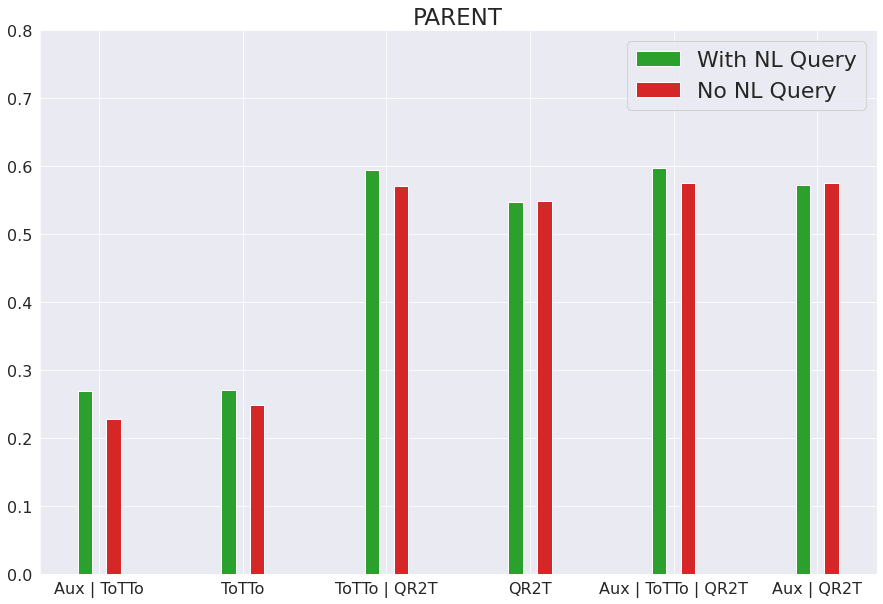

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

current_step = 1

for _, row in df_bleu.iterrows():
    plt.bar([current_step], [row['with_nl']], width=0.1, color='tab:green', label="With NL Query" if row['name'] == 'ToTTo' else None)
    plt.bar([current_step + 0.2], [row['no_nl']], width=0.1, color='tab:red', label="No NL Query" if row['name'] == 'ToTTo' else None)

    current_step += 1

plt.xticks(np.arange(1.1, 7.1), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(df_bleu['name'])

plt.ylim([0, 0.8])
plt.legend(fontsize=22)
plt.title('PARENT', fontsize=23)


plt.show()

## QR2T Bertscore - No NL Ablation

In [52]:
csv_file = '../storage/results/automatic/bertscore_no_nl_query_ablation_qr2t.csv'

df = pd.read_csv(csv_file)

mappings = {3: 0, 1: 8, 2: 7, 4: 9, 5: 10, 6: 11}
bleu_values = []
for no_nl_ind, with_nl_ind in mappings.items():
    bleu_values.append([
        df.iloc[no_nl_ind]['Name'].replace('Group: No NL Query | CI | ARIS | T5-small | ', ''),
        df.iloc[no_nl_ind]['bertscore'],
        df.iloc[with_nl_ind]['bertscore']
       ])
    
df_bleu = pd.DataFrame(bleu_values, columns=['name', 'no_nl', 'with_nl'])

# for ind, i in df.iterrows():
#     print(ind, i['Name'])

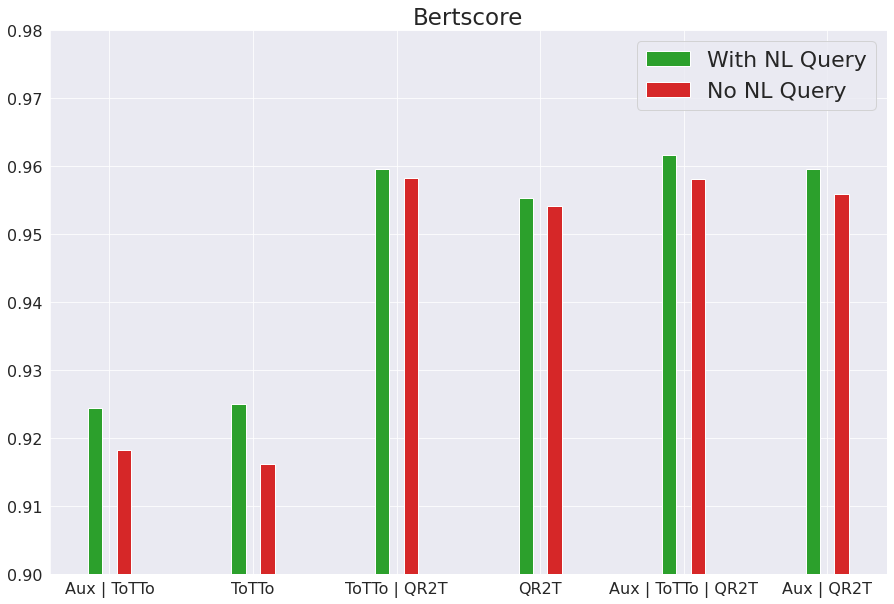

In [51]:
fig, ax = plt.subplots(figsize=(15,10))

current_step = 1

for _, row in df_bleu.iterrows():
    plt.bar([current_step], [row['with_nl']], width=0.1, color='tab:green', label="With NL Query" if row['name'] == 'ToTTo' else None)
    plt.bar([current_step + 0.2], [row['no_nl']], width=0.1, color='tab:red', label="No NL Query" if row['name'] == 'ToTTo' else None)

    current_step += 1

plt.xticks(np.arange(1.1, 7.1), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(df_bleu['name'])

plt.ylim([0.9, 0.98])
plt.legend(fontsize=22)
plt.title('Bertscore', fontsize=23)


plt.show()

## All but one visualizations

In [33]:
def plot_on_offset(file_path, offset, metric, add_label=True):
    df = pd.read_csv(file_path)
    df = df.sort_values(by=['Name'])

    current_step = 0
    
    def get_label(name):
        if 'No' in name or 'Only' in name:
            return name.split(' |')[0].replace('Group: ', '')
        else:
            return 'All tasks'
        
    for ind, row in df.iterrows():
        plt.bar([offset + current_step], [row[metric]], width=0.1, color=colors[ind], label=get_label(row['Name']) if add_label else None)
        current_step += 0.1

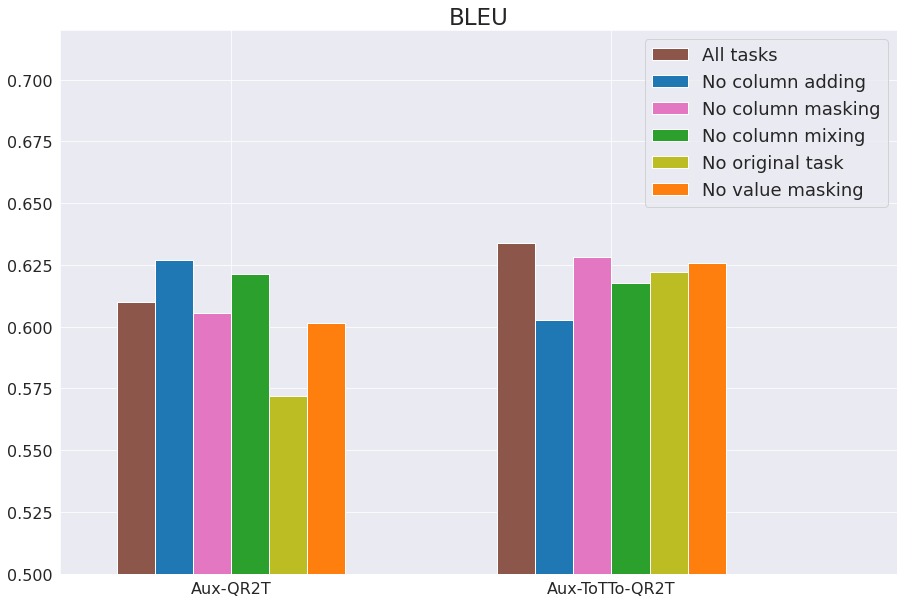

In [28]:
pre_qr2t_path = '../storage/results/automatic/all_but_one/bleu/bleu_pre_qr2t_all_but_one.csv'
pre_qr2t_totto_path = '../storage/results/automatic/all_but_one/bleu/bleu_pre_totto_qr2t_all_but_one.csv'
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:pink', 'tab:brown']

fig, ax = plt.subplots(figsize=(15,10))
    
plot_on_offset(pre_qr2t_path, 1, 'bleu', add_label=True)
plot_on_offset(pre_qr2t_totto_path, 2, 'bleu', add_label=False)

plt.ylim([0.5, 0.72])
plt.xlim([0.8, 3])

plt.xticks([1.25, 2.25], fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(['Aux-QR2T', 'Aux-ToTTo-QR2T'])

plt.title('BLEU', fontsize=23)
plt.legend(fontsize=18)
plt.show()

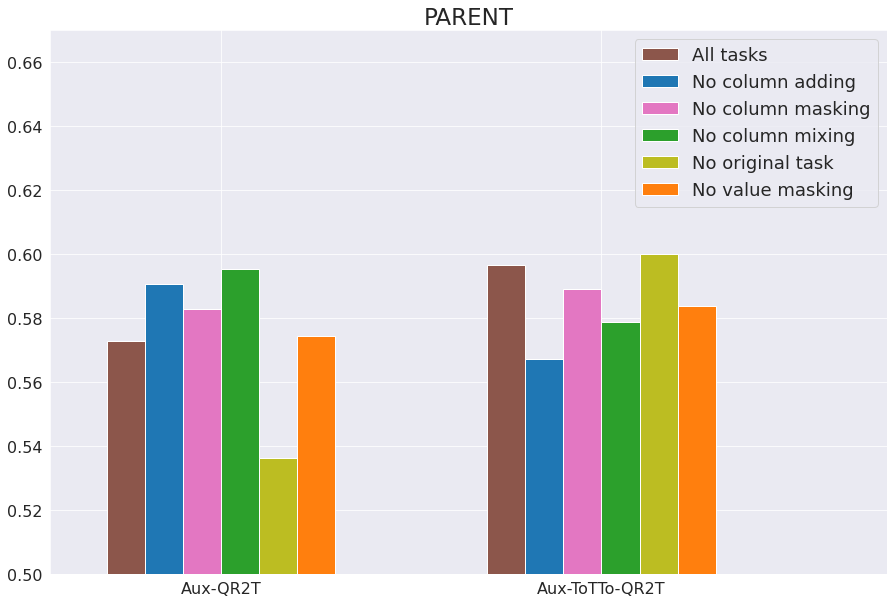

In [35]:
pre_qr2t_path = '../storage/results/automatic/all_but_one/parent/parent_pre_qr2t_all_but_one.csv'
pre_qr2t_totto_path = '../storage/results/automatic/all_but_one/parent/parent_pre_totto_qr2t_all_but_one.csv'
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:pink', 'tab:brown']

fig, ax = plt.subplots(figsize=(15,10))
    
plot_on_offset(pre_qr2t_path, 1, 'PARENT', add_label=True)
plot_on_offset(pre_qr2t_totto_path, 2, 'PARENT', add_label=False)

plt.ylim([0.5, 0.67])
plt.xlim([0.8, 3])

plt.xticks([1.25, 2.25], fontsize=16)
plt.yticks(fontsize=16)
ax.set_xticklabels(['Aux-QR2T', 'Aux-ToTTo-QR2T'])

plt.title('PARENT', fontsize=23)
plt.legend(fontsize=18)
plt.show()